In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.manifold import Isomap

%matplotlib inline

## Loading Digits Dataset
Below we are loading digits dataset with 6 classes which will load samples with digits (0-5).

In [8]:
digits = load_digits(n_class=6)

## Transforming Dataset
Below we are using Isomap manifold learning to transform digits data with 64 features to 2 features. We'll be splitting it into train and test set as well and one of which will be used for visualisation

In [9]:
isomap = Isomap(n_neighbors=5, n_components=2)
X, Y = digits.data, digits.target

print('Dataset Size Before Transformation : ',X.shape)
X = isomap.fit_transform(digits.data)
print('Dataset Size After Transformation : ',X.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.50, test_size=0.50, random_state=123)
print('Train/Test Sizes : ',X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

Dataset Size Before Transformation :  (1083, 64)
Dataset Size After Transformation :  (1083, 2)
Train/Test Sizes :  (541, 2) (542, 2) (541,) (542,)


## Visualising Data
Below we are visualising data of digits dataset which we got after transformation through Isomap. We not have digits dataset with 1083 samples with 2 features. We have divided dataset into train and test sets (50% each). Below we are visualising Train dataset to show digits.

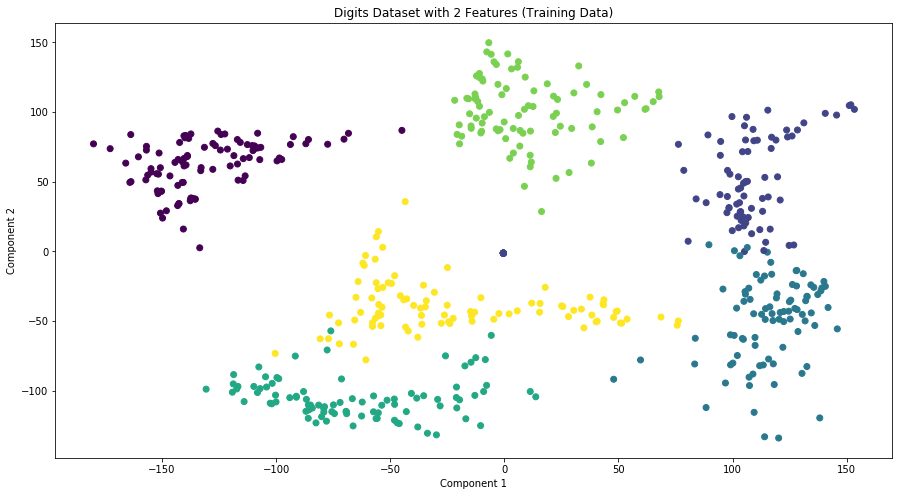

In [10]:
plt.figure(figsize=(15,8))
plt.scatter(X_train[:,0],X_train[:,1], cmap=plt.cm.viridis, c=Y_train)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Digits Dataset with 2 Features (Training Data)');

We can notice above from figure that there are 6 set of clusters as all of them are different from each custer in colors. All of clusters seems seprated properly as well by using different colors. We also have properly named X and Y axis. We also has given proper title to figure.

However, we can notice that figure is not giving much information about dataset. It's missing legend which says which color belongs to which digits.Also use of color does seem proper as it has almost 4 shades of blue. Figure is not giving much information about data than just spread of 2 components.

Below we'll try to improve this figure.

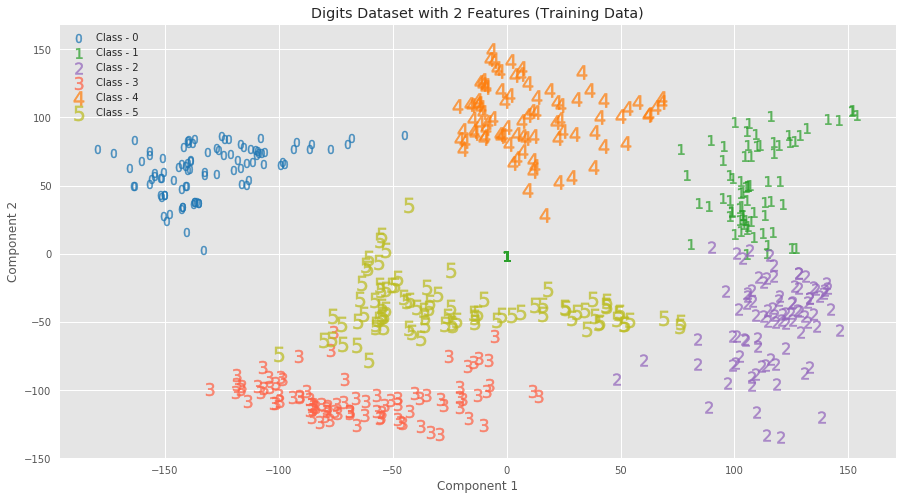

In [11]:
sizes = [80,110,140,170,200,230]
colors = ['tab:blue', 'tab:green','tab:purple','tomato','tab:orange','tab:olive']
with plt.style.context(('seaborn', 'ggplot')):
    plt.figure(figsize=(15,8))
    for i in range(6):
        plt.scatter(X_train[Y_train==i,0],X_train[Y_train==i,1], 
                    c=colors[i], 
                    s=sizes[i], 
                    alpha=0.7, 
                    marker='$'+str(i)+'$',
                    label = 'Class - '+str(i))
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.title('Digits Dataset with 2 Features (Training Data)')
    plt.legend(loc='best');

One can notice from above figure that it's quite improvement over above figure. We have designed above image keeping human `perception` in mind which is intuitive. One can easily understand above figure by just looking at it without spending extra time`(cognition)`.

* We are using `shape, color and position channels` in our figure.
* It's looks are quite different from our first figure as it helps `human perception` by showing numbers as actual marker. 
* It also presents grid.`Grid` helps users identify which points belongs where on (X,Y) axes easily. It helps when someone wants to analyze individual points and its location.
* We have introduce style as that of seaborn library and ggplot of R Programming. 
* One can also notice that color selection`(Hue)` is quite different from first figure and also easily differentiating between all classes. We have also used `alpha` to `0.7` which is `luminance` and is not that birhgt to annoy users. Our color selection is also done in a way so that it helps `color blind(red-green weakness)` people to understand different classes.
* We also have used different sizes for different classes with class 0 as least size and class 5 as max size which is referring to `preattentive features` which helps human vision recognize different patters.
* We also have improved over `markers`. In our first figure we'were using markers as just circle whereas here we'are using `actual numbers as markers` which also helps in identifying classes easily. It's `selective,quantitative and associative`. There are `6` different markers.
